## 手写MLP

In [2]:
import torch
from d2l import torch as d2l
from tqdm import tqdm

batch_size = 256
train_iter , test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
# 初始化权重
num_inputs, num_outputs, hidden_size = 784, 10, 256

W1 = torch.normal(0, 0.01, size = (num_inputs,hidden_size), requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

W2 = torch.normal(0, 0.01, size = (hidden_size, num_outputs), requires_grad=True)
b2 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2]

In [4]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim = True)
    return X_exp / partition

In [5]:
# 定义多层感知机（此处为1输入层1隐藏层1输出层）
def net(X):
    H1 = ReLU(torch.matmul(X.reshape((-1, W1.shape[0])), W1) + b1)
    H2 = ReLU(torch.matmul(H1,W2) + b2)
    return softmax(H2)

In [6]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)) , y])

In [7]:
def ReLU(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [8]:
def SGD(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
# 返回预测正确的数量 （因为最后一个batch数量未定，所以先不除以batch_size）
def accuracy(y_hat, y):
    y_hat = y_hat.argmax(axis = 1)
    cmp = (y_hat.type(y.dtype) == y)
    return cmp.sum()

In [10]:
# 训练过程
def train_epoch(net, train_iter, loss, updater):
    sum_loss = 0
    num_right = 0
    tot_num = 0
    # 每次取一个batch
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater(params, lr, X.shape[0])
        # 累加loss和预测准确数
        sum_loss += float(l.sum())
        num_right += accuracy(y_hat, y)
        tot_num += len(X)
    # 返回每个batch的准确率，以及每个样本的平均loss
    return sum_loss / tot_num, num_right / tot_num

In [13]:
def train(net, train_iter, loss, updater):
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(net,train_iter,loss,updater)
        print(f'Epoch {epoch+1} / {num_epochs}: '
              f'train loss : {train_loss}, train_accuracy: {train_acc}')

In [14]:
num_epochs = 10
lr = 0.1

train(net, train_iter, cross_entropy, SGD)

Epoch 1 / 10: train loss : 0.5895285572687785, train_accuracy: 0.8011833429336548
Epoch 2 / 10: train loss : 0.5822662670135498, train_accuracy: 0.8023666739463806
Epoch 3 / 10: train loss : 0.5763010401407878, train_accuracy: 0.8046500086784363
Epoch 4 / 10: train loss : 0.5679944796244304, train_accuracy: 0.8069833517074585
Epoch 5 / 10: train loss : 0.5640604965845744, train_accuracy: 0.8087833523750305
Epoch 6 / 10: train loss : 0.5588677888234457, train_accuracy: 0.8093500137329102
Epoch 7 / 10: train loss : 0.5534980734507243, train_accuracy: 0.8118833303451538
Epoch 8 / 10: train loss : 0.548101589012146, train_accuracy: 0.8130833506584167
Epoch 9 / 10: train loss : 0.5432570129394532, train_accuracy: 0.8140333294868469
Epoch 10 / 10: train loss : 0.5387493696848551, train_accuracy: 0.8149166703224182


In [15]:
def predict_ch3(net, test_iter, n=6): 
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

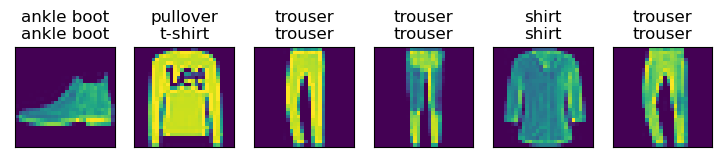

In [16]:
predict_ch3(net, test_iter)